**Udemy 6-11. A More Challenging Sequence - Part1**

# Part 1 - Autoregressive Linear Model

In [14]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

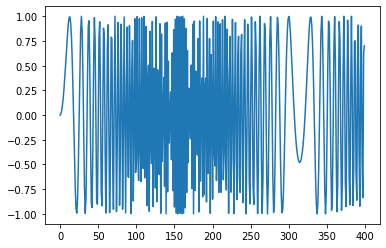

In [15]:
# Make the original data
N = 400

# data without noise
series = np.sin(0.01*np.arange(N)**2)

# Plot the series
plt.plot(series)
plt.show()

In [16]:
# Build the dataset
# Let's see if we can use T past values to predict next values
T = 10
X = []
Y = []
for t in range(len(series) - T):
  x = series[t:t+T]
  X.append(x)
  y = series[t+T]
  Y.append(y)

X = np.array(X).reshape(-1,T)
Y = np.array(Y).reshape(-1,1)
N = len(X)
print(f"X.shape = {X.shape}, Y.shape = {Y.shape}")

X.shape = (390, 10), Y.shape = (390, 1)


In [17]:
# Auto regressive linear model
model = nn.Linear(in_features=T, out_features=1)

In [18]:
# Loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.1)

In [19]:
# Make inputs and Targets
X_train = torch.from_numpy(X[:-N//2].astype(np.float32))
y_train = torch.from_numpy(Y[:-N//2].astype(np.float32))
X_test = torch.from_numpy(X[-N//2:].astype(np.float32))
y_test = torch.from_numpy(Y[-N//2:].astype(np.float32))

In [20]:
def full_gd(model, criterion, X_train, y_train, X_test, y_test, epochs=200):
  # Stuff to store
  train_losses = np.zeros(epochs)
  test_losses = np.zeros(epochs)

  for it in range(epochs):
    # Zero the parameters
    optimizer.zero_grad()

    # Forward Pass
    outputs = model(X_train)
    loss = criterion(outputs, y_train)

    # Backward and optimize
    loss.backward()
    optimizer.step()

    # Save losses
    train_losses[it] = loss.item()

    # Test losses
    outputs = model(X_test)
    loss = criterion(outputs, y_test)
    test_losses[it] = loss.item()


    if (it + 1) % 5 == 0:
      print(f"epoch: {it + 1}, train loss: {train_losses[it]:.4f}, test loss: {test_losses[it]:.4f}")
  return train_losses, test_losses


In [21]:
train_losses, test_losses = full_gd(model, criterion, X_train, y_train, X_test, y_test, epochs=200)

epoch: 5, train loss: 0.5379, test loss: 0.5950
epoch: 10, train loss: 0.5253, test loss: 0.7471
epoch: 15, train loss: 0.5151, test loss: 0.7014
epoch: 20, train loss: 0.4906, test loss: 0.5806
epoch: 25, train loss: 0.4959, test loss: 0.5422
epoch: 30, train loss: 0.4880, test loss: 0.5728
epoch: 35, train loss: 0.4855, test loss: 0.6141
epoch: 40, train loss: 0.4862, test loss: 0.6199
epoch: 45, train loss: 0.4841, test loss: 0.5888
epoch: 50, train loss: 0.4843, test loss: 0.5739
epoch: 55, train loss: 0.4836, test loss: 0.5849
epoch: 60, train loss: 0.4836, test loss: 0.5993
epoch: 65, train loss: 0.4834, test loss: 0.5941
epoch: 70, train loss: 0.4834, test loss: 0.5859
epoch: 75, train loss: 0.4834, test loss: 0.5867
epoch: 80, train loss: 0.4833, test loss: 0.5909
epoch: 85, train loss: 0.4833, test loss: 0.5921
epoch: 90, train loss: 0.4833, test loss: 0.5891
epoch: 95, train loss: 0.4833, test loss: 0.5881
epoch: 100, train loss: 0.4833, test loss: 0.5903
epoch: 105, train lo

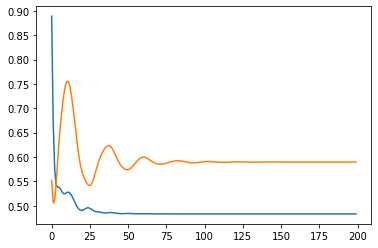

In [22]:
#Plot the train loss and test loss per iteration
plt.plot(train_losses, label="train_losses")
plt.plot(test_losses, label="test_losses")

In [23]:
# Wrong Forecast
# Wrong Forecast
# Wrong Forecast using true targets

validation_target = Y[-N//2:]
validation_predictions = []

# index of first validation input
i = 0

while len(validation_predictions) < len(validation_target):
  input_ = X_test[i].view(1,-1)
  p = model(input_)[0,0].item() # 1x1  array -> vector
  i += 1

  # Update the predictions list
  validation_predictions.append(p)


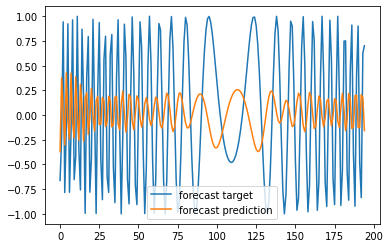

In [24]:
plt.plot(validation_target, label='forecast target')
plt.plot(validation_predictions, label='forecast prediction')
plt.legend()
plt.show()

In [25]:
# Forecast future values (use only self predictions for making future predictions)

validation_target = Y[-N//2:]
validation_predictions = []

# last trian input
# 1-D array of length T
last_x = torch.from_numpy(X[-N//2].astype(np.float32))

while len(validation_predictions) < len(validation_target):
  input_ = last_x.view(1,-1)
  p = model(input_)

  # Update the predictions list
  validation_predictions.append(p[0,0].item())

  # Make the new input
  last_x = torch.cat((last_x[1:],p[0]))

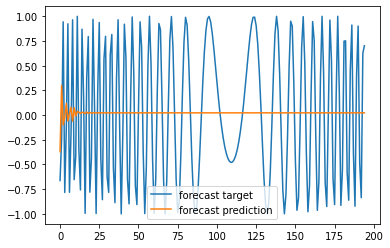

In [26]:
plt.plot(validation_target, label='forecast target')
plt.plot(validation_predictions, label='forecast prediction')
plt.legend()
plt.show()